# Gutenberg Full Dataset with CNN-Kim
CNN-Kim analysis with the Gutenberg Full dataset. Using the following configuration:
1. Using Learned Embedding
1. Embedding size: 100
1. Using document length of 5,000
1. Top vocabulary count 5,000
1. Using filter sizes of 3, 4, 5, 6
1. Adam Learning Rate of 1e-4
1. L2-contraint 0.001

In [1]:
%matplotlib inline

import os
import sys
ai_lit_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
print("Loading AI Lit system from path", ai_lit_path)
sys.path.append(ai_lit_path)

import numpy as np
import tensorflow as tf

from ai_lit.analysis import analysis_util
from ai_lit.university.gutenberg import gb_full_cnn_kim

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

Loading AI Lit system from path C:\Users\joewo\workspaces\python\ai_lit


C:\Tools\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.document_length = 5000
tf.flags.FLAGS.vocab_count = 5000
tf.flags.FLAGS.embedding_size=100

dataset_wkspc = os.path.join(ai_lit_path, 'workspace', 'gb_input')
training_wkspc = os.path.join(ai_lit_path, 'workspace', 'gutenberg_full')
model_name = 'cnn_kim_l2_learned_embedding'
univ = gb_full_cnn_kim.GbFullCnnKimUniversity(model_name, training_wkspc, dataset_wkspc)

In [3]:
latest_run = univ.get_latest_run_dir()
if latest_run is None:
    latest_run = univ.train()
targets, predictions = univ.get_or_perform_evaluation(latest_run)

Found 1 runs. Selecting the latest 20180113-161136


In [4]:
accuracy = accuracy_score(targets, predictions)
f1 = f1_score(targets, predictions, average='macro')
print("Accuracy:", accuracy)
print("F1:", f1)

Accuracy: 0.623480769231
F1: 0.553693060824


Normalized confusion matrix
[[ 0.89  0.09  0.    0.01  0.01  0.  ]
 [ 0.06  0.74  0.07  0.08  0.02  0.03]
 [ 0.03  0.42  0.44  0.1   0.    0.01]
 [ 0.06  0.36  0.02  0.49  0.03  0.04]
 [ 0.06  0.49  0.02  0.21  0.2   0.03]
 [ 0.03  0.36  0.01  0.11  0.01  0.49]]


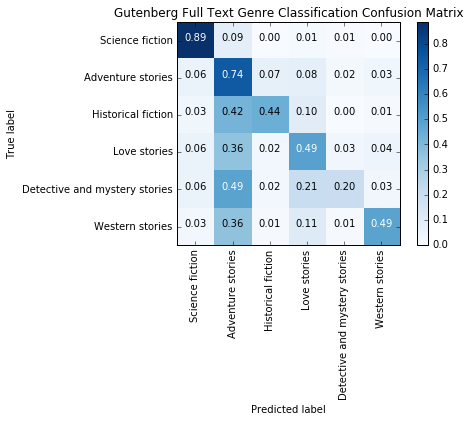

In [5]:
cnf_matrix = confusion_matrix(targets, predictions)
analysis_util.plot_confusion_matrix(cnf_matrix, classes=univ.subjects, normalize=True,
                      title='Gutenberg Full Text Genre Classification Confusion Matrix')